# Finding Outlier

In [4]:
# Using z score
# Using the Interquartile range
# Using percentile

### Using Z-score 

In [6]:
# If data have normal distribution then use z-score
# The value outside std deviation i.e. outside the interval (mean - 3*std) and (mean + 3*std) are outliers

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data = pd.read_csv('scholarship.csv')

In [12]:
data.head()

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0


In [14]:
data.shape

(1000, 3)

In [16]:
# for checking Outliers 1st check that which column follow normal distribution

C:\Users\Rituparn Dwivedi\AppData\Local\Temp\ipykernel_9464\3440143213.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['semester_percentage'])


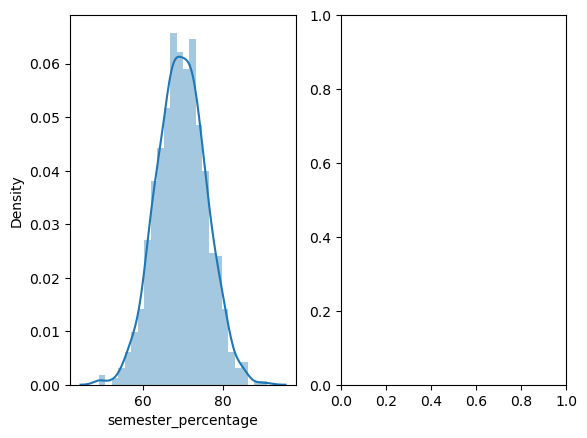

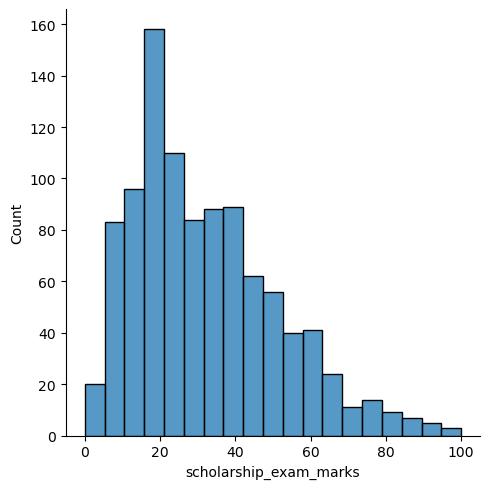

In [18]:
plt.subplot(1,2,1)
sns.distplot(data['semester_percentage'])
plt.subplot(1,2,2)
sns.displot(data['scholarship_exam_marks'])
plt.show()

In [20]:
# according to above fig sem_percentage show the normal distribution

In [22]:
mean = data['semester_percentage'].mean()
std = data['semester_percentage'].std()
print(mean,' ',std)

69.6124   6.158978751323897


In [24]:
high_allowed = mean + 3*std
low_allowed = mean - 3*std
print(high_allowed,'',low_allowed)

88.08933625397168  51.13546374602831


In [26]:
data[(data['semester_percentage']<low_allowed) | (data['semester_percentage']>high_allowed)] # these are outliers

,semester_percentage,scholarship_exam_marks,got_scholarship
485,49.2,44,1
995,88.7,44,1
996,91.2,65,1
997,48.9,34,0
999,49.0,10,1


In [28]:
data[(data['semester_percentage']<low_allowed) | (data['semester_percentage']>high_allowed)].info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 485 to 999
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   semester_percentage     5 non-null      float64
 1   scholarship_exam_marks  5 non-null      int64  
 2   got_scholarship         5 non-null      int64  
dtypes: float64(1), int64(2)
memory usage: 160.0 bytes


In [30]:
# Findig the outlier by using z-score formula
# z_score = (x - mean)/std 

In [32]:
data['z_score'] = (data['semester_percentage'] - data['semester_percentage'].mean())/(data['semester_percentage'].std())

In [34]:
data['z_score'].head()

0    0.371425
1    0.809810
2    0.939701
3   -0.878782
4    0.436371
Name: z_score, dtype: float64

In [36]:
data.head()

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
0,71.9,26,1,0.371425
1,74.6,38,1,0.809810
2,75.4,40,1,0.939701
3,64.2,8,1,-0.878782
4,72.3,17,0,0.436371


In [38]:
# Here we got a column of z_score, in this case we don't need to find the lowest and highest value
# we will check the value which are greater than +3 and lower than -3 that are outliers

In [40]:
data[(data['z_score']<-3) | (data['z_score']>3)]

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
485,49.2,44,1,-3.314251
995,88.7,44,1,3.099150
996,91.2,65,1,3.505062
997,48.9,34,0,-3.362960
999,49.0,10,1,-3.346724


# Treat the Outlier

### Trimming

In [42]:
# Now i am going to remove the outlier by trimming

In [44]:
data[(data['semester_percentage']>low_allowed) & (data['semester_percentage']<high_allowed)] # these are values without outlier

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
0,71.9,26,1,0.371425
1,74.6,38,1,0.809810
2,75.4,40,1,0.939701
3,64.2,8,1,-0.878782
4,72.3,17,0,0.436371
...,...,...,...,...
991,70.4,57,0,0.127878
992,62.6,12,0,-1.138565
993,67.3,21,1,-0.375452
994,64.8,63,0,-0.781363


# Caping

In [46]:
# There might be chanced that these 5 rows who has been deleted have some important information 
# so don't want to trim those rows, make a capping on those rows 

In [48]:
# for making capping we will used a numpy library and find out the upper and lower limit

In [50]:
# df = np.where(condition[x,y]) 
# if condition get satisfied then go with x
# and if codition not satisfied then go with y

In [52]:
upper_limit = mean + 3*std
lower_limit = mean - 3*std

In [54]:
print(upper_limit,' ',lower_limit)

88.08933625397168   51.13546374602831


In [56]:
df = data['semester_percentage']

In [58]:
df['semester_percentage'] = np.where(data['semester_percentage']>upper_limit,
                                       upper_limit, np.where(data['semester_percentage']<lower_limit,
                                                             lower_limit, data['semester_percentage']))

C:\Users\Rituparn Dwivedi\AppData\Local\Temp\ipykernel_9464\3857212703.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['semester_percentage'] = np.where(data['semester_percentage']>upper_limit,


In [60]:
df['semester_percentage']

array([71.9       , 74.6       , 75.4       , 64.2       , 72.3       ,
       73.        , 66.9       , 71.2       , 64.5       , 77.5       ,
       68.2       , 63.8       , 65.8       , 56.8       , 79.1       ,
       71.        , 65.3       , 75.6       , 69.3       , 76.3       ,
       66.9       , 74.3       , 67.6       , 60.5       , 64.4       ,
       62.8       , 74.5       , 65.3       , 72.3       , 65.1       ,
       74.6       , 76.6       , 59.1       , 62.3       , 81.5       ,
       74.8       , 68.5       , 85.1       , 65.8       , 72.5       ,
       66.        , 67.        , 74.6       , 78.5       , 78.8       ,
       69.2       , 73.        , 69.2       , 62.9       , 82.3       ,
       62.        , 62.4       , 75.3       , 66.9       , 84.2       ,
       81.2       , 69.3       , 77.3       , 73.4       , 77.        ,
       79.4       , 75.1       , 76.1       , 62.2       , 69.8       ,
       62.7       , 66.7       , 80.4       , 65.8       , 74.1 

In [62]:
df.head(-1)

0      71.9
1      74.6
2      75.4
3      64.2
4      72.3
       ... 
995    88.7
996    91.2
997    48.9
998    86.2
999    49.0
Name: semester_percentage, Length: 1000, dtype: object

### Remove Outlier using IQR

In [64]:
# The data ranges that contain the middle 50% data 
# IQR = Q3 - Q!

In [66]:
# let's checked that is skewed or not

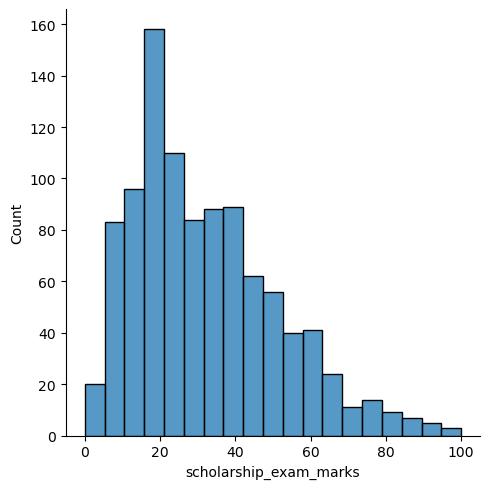

In [68]:
sns.displot(data['scholarship_exam_marks'])

In [72]:
Q1 = data['scholarship_exam_marks'].quantile(0.25)
Q2 = data['scholarship_exam_marks'].quantile(0.50)
Q3 = data['scholarship_exam_marks'].quantile(0.75)

In [74]:
Q1

17.0

In [76]:
Q2

28.0

In [78]:
Q3

44.0

In [80]:
# we can also find the quantile by using describe

In [82]:
data.describe()

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
count,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,69.612400,32.225000,0.489000,9.876544e-16
std,6.158979,19.130822,0.500129,1.000000e+00
min,48.900000,0.000000,0.000000,-3.362960e+00
25%,65.500000,17.000000,0.000000,-6.677081e-01
50%,69.600000,28.000000,0.000000,-2.013321e-03
75%,73.700000,44.000000,1.000000,6.636815e-01
max,91.200000,100.000000,1.000000,3.505062e+00


In [86]:
# find the value of IQR

In [90]:
IQR = Q3 - Q1
IQR

27.0

In [84]:
# Now find out the max and min value

In [96]:
max_value = Q3 + 1.5 * IQR
min_value = Q1 - 1.5 * IQR

In [98]:
max_value, min_value

(84.5, -23.5)

In [102]:
data[(data['scholarship_exam_marks']<min_value) | (data['scholarship_exam_marks']>max_value)]

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
9,77.5,94,1,1.280667
40,66.0,86,1,-0.586526
61,75.1,86,0,0.890992
134,63.3,93,0,-1.024910
162,78.0,90,0,1.361849
283,70.9,87,0,0.209061
290,83.8,87,0,2.303564
311,69.7,87,1,0.014223
324,66.4,90,0,-0.521580
630,65.6,96,1,-0.651472


In [112]:
# remove outlers by trimming

In [118]:
new_data = data[(data['scholarship_exam_marks']>min_value) & (data['scholarship_exam_marks']<max_value)]

In [120]:
new_data

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
0,71.9,26,1,0.371425
1,74.6,38,1,0.809810
2,75.4,40,1,0.939701
3,64.2,8,1,-0.878782
4,72.3,17,0,0.436371
...,...,...,...,...
995,88.7,44,1,3.099150
996,91.2,65,1,3.505062
997,48.9,34,0,-3.362960
998,86.2,46,1,2.693239


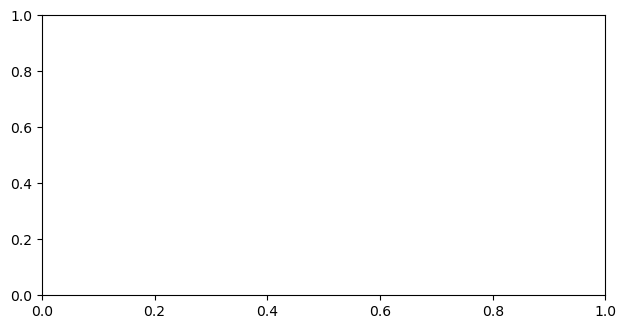

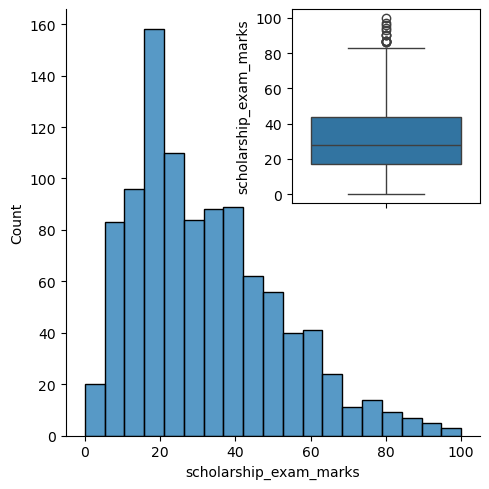

In [126]:
plt.figure(figsize = (16,8))
plt.subplot(2,2,1)
sns.displot(data['scholarship_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(data['scholarship_exam_marks'])

plt.show()

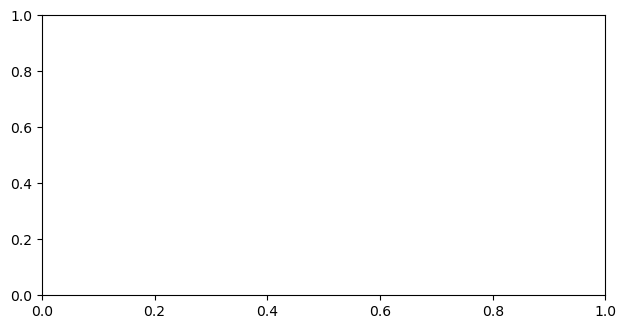

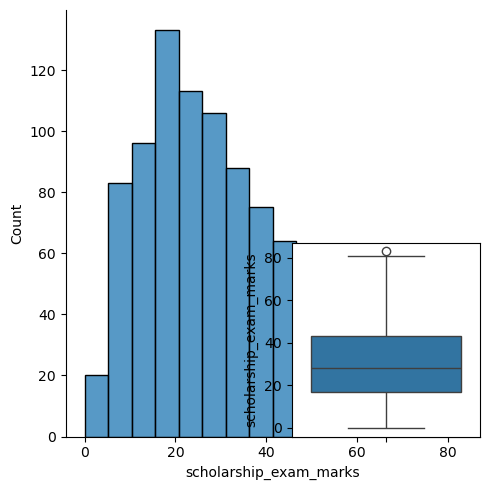

In [124]:
plt.figure(figsize = (16,8))
plt.subplot(2,2,3)
sns.displot(new_data['scholarship_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_data['scholarship_exam_marks'])

plt.show()

In [128]:
# remove the outliers by capping

In [132]:
data['scholarship_exam_marks'] = np.where(data['scholarship_exam_marks']>max_value, max_value, 
                                           np.where(data['scholarship_exam_marks']<min_value, min_value,
                                                    data['scholarship_exam_marks']))

In [134]:
data.shape


(1000, 4)

In [136]:
data.info

<bound method DataFrame.info of      semester_percentage  scholarship_exam_marks  got_scholarship   z_score
0                   71.9                    26.0                1  0.371425
1                   74.6                    38.0                1  0.809810
2                   75.4                    40.0                1  0.939701
3                   64.2                     8.0                1 -0.878782
4                   72.3                    17.0                0  0.436371
..                   ...                     ...              ...       ...
995                 88.7                    44.0                1  3.099150
996                 91.2                    65.0                1  3.505062
997                 48.9                    34.0                0 -3.362960
998                 86.2                    46.0                1  2.693239
999                 49.0                    10.0                1 -3.346724

[1000 rows x 4 columns]>

<Axes: ylabel='scholarship_exam_marks'>

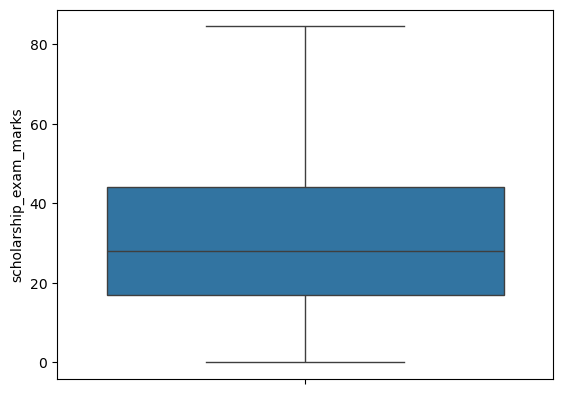

In [138]:
sns.boxplot(data['scholarship_exam_marks'])